# **Logistic Regression Classifier**

## **Importing the libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## **Importing the dataset**

In [2]:
data = pd.read_csv('preprocessed_data.csv', index_col=0)
data.head()

,age,vis_wuhan,from_wuhan,diff_sym_hos,result,location_1,location_4,location_5,location_6,location_7,...,symptom1_2,symptom1_6,symptom1_14,symptom2_7,symptom2_17,symptom2_31,symptom3_19,symptom4_12,symptom5_3,symptom6_1
0,0.680851,1,0,8,1,0,0,0,0,0,...,0,0,1,0,0,1,1,1,1,1
1,0.574468,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,1,1,1
2,0.468085,0,1,13,0,0,0,0,0,0,...,0,0,1,0,0,1,1,1,1,1
3,0.617021,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,1,1,1
4,0.595745,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,1,1,1


## **Splitting the dataset into Training set and Test set**

In [3]:
X = data.iloc[:,:-1]
y = data['result']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= .2, stratify=y)

## **Training the SVM Classification model on the Training set**

In [5]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=1, penalty='l2')
classifier.fit(X_train, y_train)

LogisticRegression(C=1)

## Predicting a new result

In [6]:
y_pred = classifier.predict(X_test)

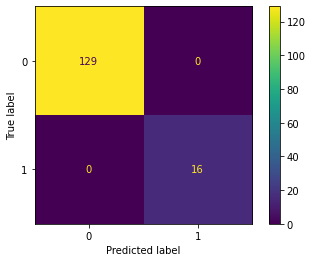

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(classifier, X_test, y_test)

# Classification Metrics

In [8]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [9]:
# Classification Accuracy on the Test Set
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy: {0:0.4f}'.format(classification_accuracy))

Classification accuracy: 1.0000


In [10]:
# Classification Error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error: {0:0.4f}'.format(classification_error))

Classification error: 0.0000


In [11]:
# Precision Score
precision = TP / float(TP + FP)
print('Precision: {0:0.4f}'.format(precision))

Precision: 1.0000


In [12]:
# Recall or Sensitivity
recall = TP / float(TP + FN)
print('Recall or Sensitivity: {0:0.4f}'.format(recall))

Recall or Sensitivity: 1.0000


In [13]:
# F1 Score
f1 = 2 * (precision * recall) / (precision + recall)
print('F1 score: {0:0.4f}'.format(f1))

F1 score: 1.0000


In [14]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00        16

    accuracy                           1.00       145
   macro avg       1.00      1.00      1.00       145
weighted avg       1.00      1.00      1.00       145



# ROC & AUC

### **Prediction probabilities** 

In [15]:
r_probs = [0 for _ in range(len(y_test))]
lr_probs = classifier.predict_proba(X_test)

In [16]:
lr_probs = lr_probs[:, 1]

In [17]:
# ROC Curve and AUC
from sklearn.metrics import roc_curve, roc_auc_score

### Calculate AUC
ROC is the receiver operating characteristic - AUC is the area under the ROC curve

In [18]:
r_auc = roc_auc_score(y_test, r_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

### Print AUC score

In [19]:
print('Random (chance) Prediction: AUC = %.3f' % (r_auc))
print('logistic: AUC = %.3f' % (lr_auc))

Random (chance) Prediction: AUC = 0.500
logistic: AUC = 1.000


In [20]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

In [21]:
import matplotlib.pyplot as plt

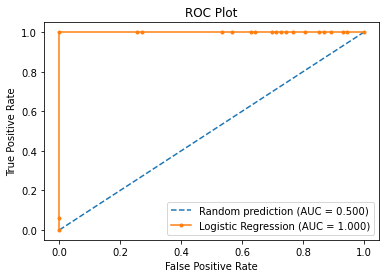

In [22]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUC = %0.3f)' % r_auc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression (AUC = %0.3f)' % lr_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

# Hyperparameters' Tuning

In [23]:
from sklearn.model_selection import GridSearchCV
parameters = {'C':[1,2,3,4,5,6,7,8,9,10], 'penalty':('l1', 'l2', 'elasticnet', 'none')}
result = GridSearchCV(classifier, parameters, refit=True, cv=None, verbose=10)
result.fit(data, data.result)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5; 1/40] START C=1, penalty=l1............................................
[CV 1/5; 1/40] END ...............C=1, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 1/40] START C=1, penalty=l1............................................
[CV 2/5; 1/40] END ...............C=1, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 1/40] START C=1, penalty=l1............................................
[CV 3/5; 1/40] END ...............C=1, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 1/40] START C=1, penalty=l1............................................
[CV 4/5; 1/40] END ...............C=1, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 1/40] START C=1, penalty=l1............................................
[CV 5/5; 1/40] END ...............C=1, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 2/40] START C=1, penalty=l2............................................
[CV 1/5; 2/40] END .............C=1, penalty=l2

C:\Users\osama\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\osama\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\osama\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\osama\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\osama\anaconda3\lib\site-packages\sklearn\model_selection\_v

[CV 5/5; 6/40] END .............C=2, penalty=l2;, score=1.000 total time=   0.0s
[CV 1/5; 7/40] START C=2, penalty=elasticnet....................................
[CV 1/5; 7/40] END .......C=2, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5; 7/40] START C=2, penalty=elasticnet....................................
[CV 2/5; 7/40] END .......C=2, penalty=elasticnet;, score=nan total time=   0.0s
[CV 3/5; 7/40] START C=2, penalty=elasticnet....................................
[CV 3/5; 7/40] END .......C=2, penalty=elasticnet;, score=nan total time=   0.0s
[CV 4/5; 7/40] START C=2, penalty=elasticnet....................................
[CV 4/5; 7/40] END .......C=2, penalty=elasticnet;, score=nan total time=   0.0s
[CV 5/5; 7/40] START C=2, penalty=elasticnet....................................
[CV 5/5; 7/40] END .......C=2, penalty=elasticnet;, score=nan total time=   0.0s
[CV 1/5; 8/40] START C=2, penalty=none..........................................
[CV 1/5; 8/40] END .........

C:\Users\osama\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\osama\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\osama\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\osama\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\osama\anaconda3\lib\site-packages\sklearn\model_sele

[CV 5/5; 12/40] END ..........C=3, penalty=none;, score=1.000 total time=   0.0s
[CV 1/5; 13/40] START C=4, penalty=l1...........................................
[CV 1/5; 13/40] END ..............C=4, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 13/40] START C=4, penalty=l1...........................................
[CV 2/5; 13/40] END ..............C=4, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 13/40] START C=4, penalty=l1...........................................
[CV 3/5; 13/40] END ..............C=4, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 13/40] START C=4, penalty=l1...........................................
[CV 4/5; 13/40] END ..............C=4, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 13/40] START C=4, penalty=l1...........................................
[CV 5/5; 13/40] END ..............C=4, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 14/40] START C=4, penalty=l2...........................................
[CV 1/5; 14/40] END ........

C:\Users\osama\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\osama\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\osama\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\osama\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\osama\anaconda3\lib\site-packages\sklearn\model_selection\_v

[CV 3/5; 18/40] END ............C=5, penalty=l2;, score=1.000 total time=   0.0s
[CV 4/5; 18/40] START C=5, penalty=l2...........................................
[CV 4/5; 18/40] END ............C=5, penalty=l2;, score=1.000 total time=   0.0s
[CV 5/5; 18/40] START C=5, penalty=l2...........................................
[CV 5/5; 18/40] END ............C=5, penalty=l2;, score=1.000 total time=   0.0s
[CV 1/5; 19/40] START C=5, penalty=elasticnet...................................
[CV 1/5; 19/40] END ......C=5, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5; 19/40] START C=5, penalty=elasticnet...................................
[CV 2/5; 19/40] END ......C=5, penalty=elasticnet;, score=nan total time=   0.0s
[CV 3/5; 19/40] START C=5, penalty=elasticnet...................................
[CV 3/5; 19/40] END ......C=5, penalty=elasticnet;, score=nan total time=   0.0s
[CV 4/5; 19/40] START C=5, penalty=elasticnet...................................
[CV 4/5; 19/40] END ......C=

C:\Users\osama\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\osama\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\osama\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\osama\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\osama\anaconda3\lib\site-packages\sklearn\model_sele

[CV 5/5; 24/40] END ..........C=6, penalty=none;, score=1.000 total time=   0.0s
[CV 1/5; 25/40] START C=7, penalty=l1...........................................
[CV 1/5; 25/40] END ..............C=7, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 25/40] START C=7, penalty=l1...........................................
[CV 2/5; 25/40] END ..............C=7, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 25/40] START C=7, penalty=l1...........................................
[CV 3/5; 25/40] END ..............C=7, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 25/40] START C=7, penalty=l1...........................................
[CV 4/5; 25/40] END ..............C=7, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 25/40] START C=7, penalty=l1...........................................
[CV 5/5; 25/40] END ..............C=7, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 26/40] START C=7, penalty=l2...........................................
[CV 1/5; 26/40] END ........

C:\Users\osama\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\osama\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\osama\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\osama\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\osama\anaconda3\lib\site-packages\sklearn\model_sele

[CV 5/5; 30/40] END ............C=8, penalty=l2;, score=1.000 total time=   0.0s
[CV 1/5; 31/40] START C=8, penalty=elasticnet...................................
[CV 1/5; 31/40] END ......C=8, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5; 31/40] START C=8, penalty=elasticnet...................................
[CV 2/5; 31/40] END ......C=8, penalty=elasticnet;, score=nan total time=   0.0s
[CV 3/5; 31/40] START C=8, penalty=elasticnet...................................
[CV 3/5; 31/40] END ......C=8, penalty=elasticnet;, score=nan total time=   0.0s
[CV 4/5; 31/40] START C=8, penalty=elasticnet...................................
[CV 4/5; 31/40] END ......C=8, penalty=elasticnet;, score=nan total time=   0.0s
[CV 5/5; 31/40] START C=8, penalty=elasticnet...................................
[CV 5/5; 31/40] END ......C=8, penalty=elasticnet;, score=nan total time=   0.0s
[CV 1/5; 32/40] START C=8, penalty=none.........................................
[CV 1/5; 32/40] END ........

C:\Users\osama\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\osama\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\osama\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\osama\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\osama\anaconda3\lib\site-packages\sklearn\model_sele